In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

#### Se Carga la cuenta para poder realizar las simulaciones
#IBMQ.load_account()
###

%matplotlib inline
# Librerías estandar de Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *

#Librería para optimizar el circuito que se diseñe
from qiskit.compiler import transpile, assemble

#Librerias para el trabajo en el dispositivo real
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ

#Librerias para la visualización por medio de la esfera de Bloch y de histogramas
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city

## Librerías para la visualización de Vectores y matrices
###Display usando markdown
import numpy as np
from IPython.display import display, Markdown, Latex
from array_to_latex import to_ltx
###Otros Display
from herramientas.tools import vector2latex
from herramientas.learn_quantum import format_state_vector
from herramientas.learn_quantum import print_short_state_vector
from herramientas.tools import unitary2latex

from herramientas.tools import unitary2latex2 #Funcion creada para poder visualizar la parte imaginaria

## Se configura la forma de visualizar los vectores con el uso latex y markdown
latex_formatter = get_ipython().display_formatter.formatters["text/latex"]
latex_formatter.for_type(np.ndarray, lambda m: to_ltx(m, print_out=False))

In [2]:
# x.count_ops()

In [10]:
from qiskit.circuit.library import WeightedAdder
y=WeightedAdder(num_state_qubits=3, name= 'Wadd')
# x._build()
y.draw()

»
state_0: ──■────■────■─────────■───────────────────────────────────────────────»
           │    │    │         │                                               »
state_1: ──┼────┼────┼─────────┼─────────■────■────■─────────■─────────────────»
           │    │    │         │         │    │    │         │                 »
state_2: ──┼────┼────┼─────────┼─────────┼────┼────┼─────────┼─────────■────■──»
           │  ┌─┴─┐  │  ┌───┐  │  ┌───┐  │  ┌─┴─┐  │  ┌───┐  │  ┌───┐  │  ┌─┴─┐»
  sum_0: ──■──┤ X ├──┼──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──■──┤ X ├──■──┤ X ├»
           │  └───┘┌─┴─┐└───┘  │  └───┘  │  └───┘┌─┴─┐└───┘  │  └───┘  │  └───┘»
  sum_1: ──┼───────┤ X ├───────┼─────────┼───────┤ X ├───────┼─────────┼───────»
         ┌─┴─┐     └─┬─┘     ┌─┴─┐     ┌─┴─┐     └─┬─┘     ┌─┴─┐     ┌─┴─┐     »
carry_0: ┤ X ├───────■───────┤ X ├─────┤ X ├───────■───────┤ X ├─────┤ X ├─────»
         └───┘               └───┘     └───┘               └───┘     └───┘     »
«                             
«state_0: ────────────────────
«                             
«state_1: ────────────────────
«                             
«state_2: ──■─────────■───────
«           │  ┌───┐  │  ┌───┐
«  sum_0: ──┼──┤ X ├──■──┤ X ├
«         ┌─┴─┐└───┘  │  └───┘
«  sum_1: ┤ X ├───────┼───────
«         └─┬─┘     ┌─┴─┐     
«carry_0: ──■───────┤ X ├─────
«                   └───┘

In [11]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('00011111111')

In [12]:
new_sv = sv.evolve(x)

In [13]:
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

0.0

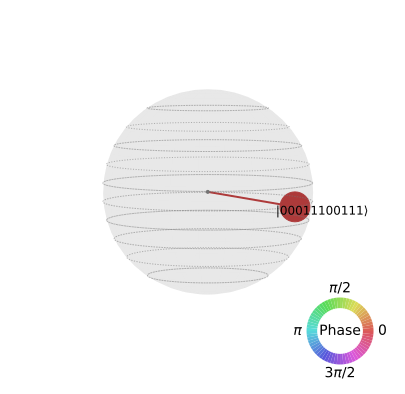

In [14]:
plot_state_qsphere(new_sv.data)

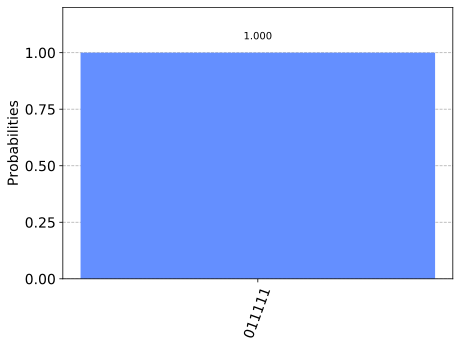

In [7]:
counts = new_sv.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)